# Analysis of Republic by Plato

In this notebook a brief analysis of Plato's Republic will be conducted. 
This work is one of the best-known done by Plato and arguably most influential ancient philosophical and political book.
Written around 375 BC in style of Socratic dialogue, it contains mostly dialogues between Socrates and various Athenians about justice, utopian class of philosopher-kings and other important philosophical topics.

Source: <https://www.perseus.tufts.edu/hopper/text?doc=Perseus%3Atext%3A1999.01.0168%3Abook%3D1>

## Preparing and verifying the Corpus

Analysis of this book will be conducted by dividing it into seperate sub-books proposed by Plato. 

In [1]:
# Private dependencies
import corpus_class as dc
import tokenedtext_class as prep
import freq_analysis as freq_a
import comp_analysis as comp_a
import result_visualisation as re_vis

# Public dependencies
import os
import matplotlib.pyplot as plt

In [2]:
# Loading and creating the Corpus
plato_path = f"{os.getcwd()}\exemplar_texts\\plato_republic"
plato_corpus = dc.Corpus(plato_path)

Processing plato_republic_01.txt...
Processing plato_republic_02.txt...
Processing plato_republic_03.txt...
Processing plato_republic_04.txt...
Processing plato_republic_05.txt...
Processing plato_republic_06.txt...
Processing plato_republic_07.txt...
Processing plato_republic_08.txt...
Processing plato_republic_09.txt...
Processing plato_republic_10.txt...
Corpus plato_republic has been created


In [3]:
# Printing basic information concerning the Corpus
plato_info = plato_corpus.get_basic_info()
print(plato_info)

Basic info concerning plato_republic corpus:
Number of text files: 10
Number of distinct tokens: 8147
Total number of words: 51337


**Basic information concerning Plato's Republic**

There are 8147 unique words used in the whole work and 51337 words in total. 

## Basic frequency analysis on Republic Corpus

Following graphs will concern entirety of the Corpus, which constist of all the sub-books.
Most common words used will be graphed, as well as WordCloud, to better visualise what the book mostly concerns.
There are many terms which were used only single time throughout the whole book and so I see little sense on showing them.

**Bar graph:**

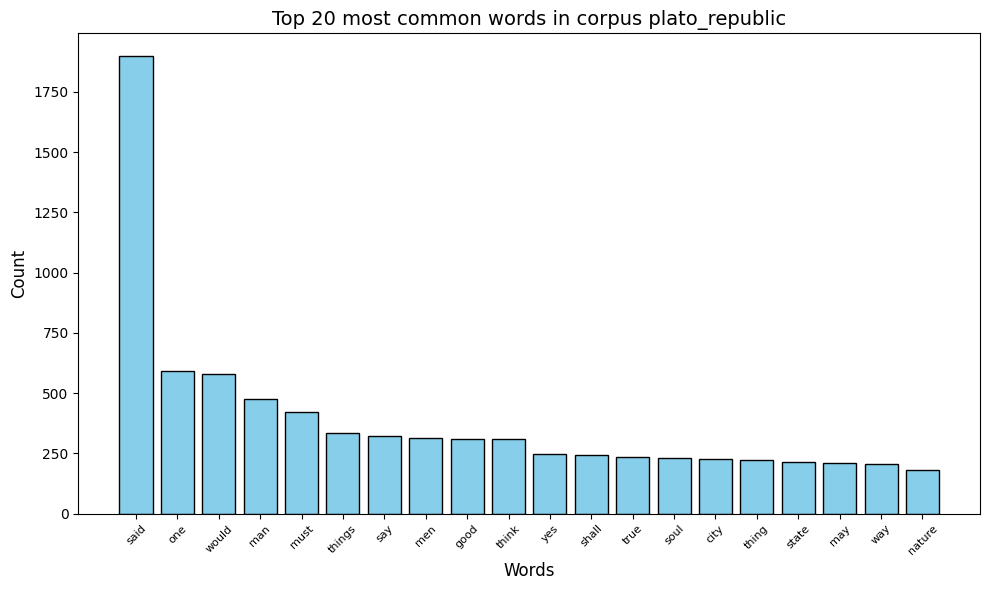

In [4]:
# Bar graph of most common words
plato_common = freq_a.create_bar_count(plato_corpus, n=20)
plt.show()

**Comment:**

Most common words seem to fit the distinctive characteristics of Socratic dialogue, narrated by a third person. 'Said' points to most common word used by the narrator. 'One', 'would', 'man', 'must', 'things' are most probably spoken by participants of the dialogues themselves and points to philosophical content of their speech, general in their applicability.

**WordCloud:**

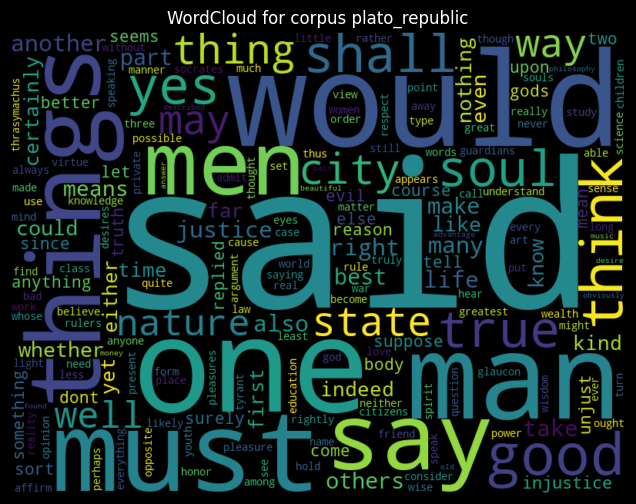

In [5]:
# WordCloud
plato_wordcloud = freq_a.create_word_cloud(plato_corpus)
plt.show()

**Comment:**

To continue with reasoning introduced in previous comment, WordCload further allows us to grasp most common topics raised in conversations within The Republic. 'Nature', 'justice', 'state', 'rulers', 'soul', 'wisdom' are terms which might generally be used during very general, philosophical conversations concerning virtues and limitations of humans as leaders and followers in various ruling contexts.

## Comparative analysis between respective sub-books in Republic Corpus

In this part I will focus on comparisons made between books within The Republic. 

**Cosine Similarity:**
To begin with I decided to use Cosine Similarity as a measure of very general similarity between two texts. By calculating cosine similarity pairwise between every two books of Republic, I obtained similarity matrix which I decided to present as a heatmap.

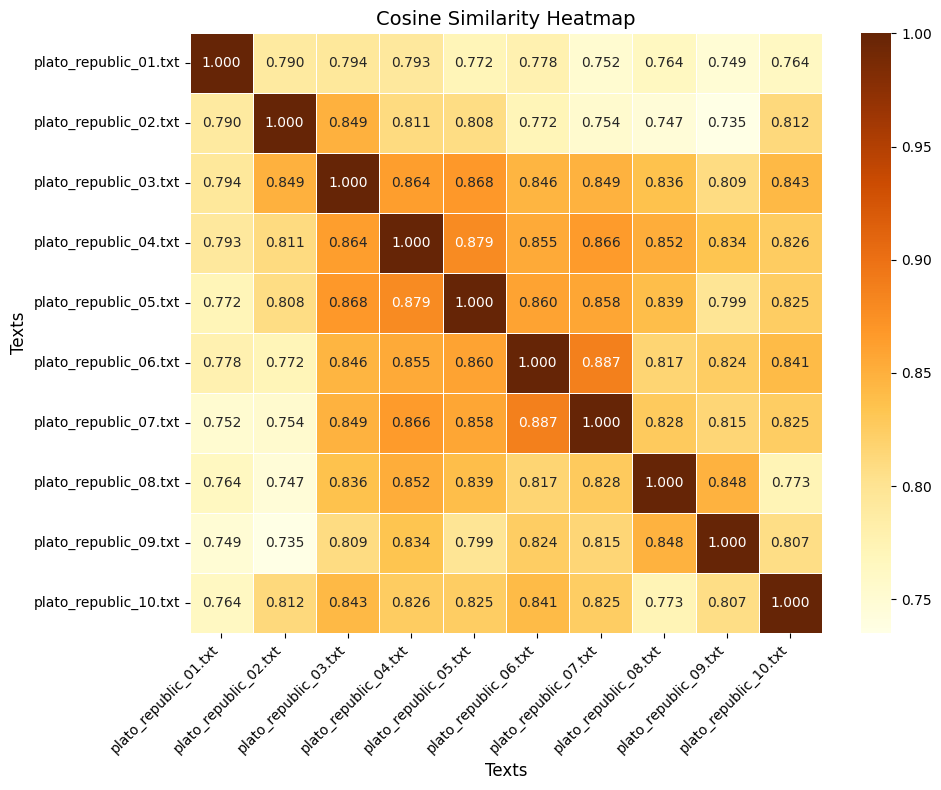

In [6]:
plato_csim = plato_corpus.cos_similarity_matrix()
plato_csim_fig = comp_a.plot_cos_similarity_heatmap(plato_csim)
plt.show()

**Comment:**
On presented heatmap, first thing most noticable is the diagonal which has value of 1. Naturally, this happens because each book has highest possible similarity to itself. 

Apart from the diagonal, we can notice high-similarity cluster in books from third to seventh - it might point to the fact that these books concern similar topics or have similarly constructed dialogues. There is also arguably second cluster consisting of first four books. These two clusters overlap, which might indicate how fast the topics 'flow' from book to book - Plato smoothly transitions between the text structure and topic. 


This can also be seen by gradually decreasing similarity between the first book and consecutive books - later books have smaller similarity to the first one than books directly after the first book *(0.790 v. 0.749)*. Another interesting result are similarities to the last, closing book - it is quite similar to every other book, which indicates that it might somehow summarise everything which has been written before. Further investigation would have to be conducted. 

Least similar are the second and the ninth book, with cosine similarity value of 0.735. 

**TF-IDF:**

Now TF-IDF Heatmap will be presented. It informs us about uniqueness of specific terms in the Corpus. Terms analysed are picked randomly, you can play with the randomization by providing a different seed in get_random_tokens function. 

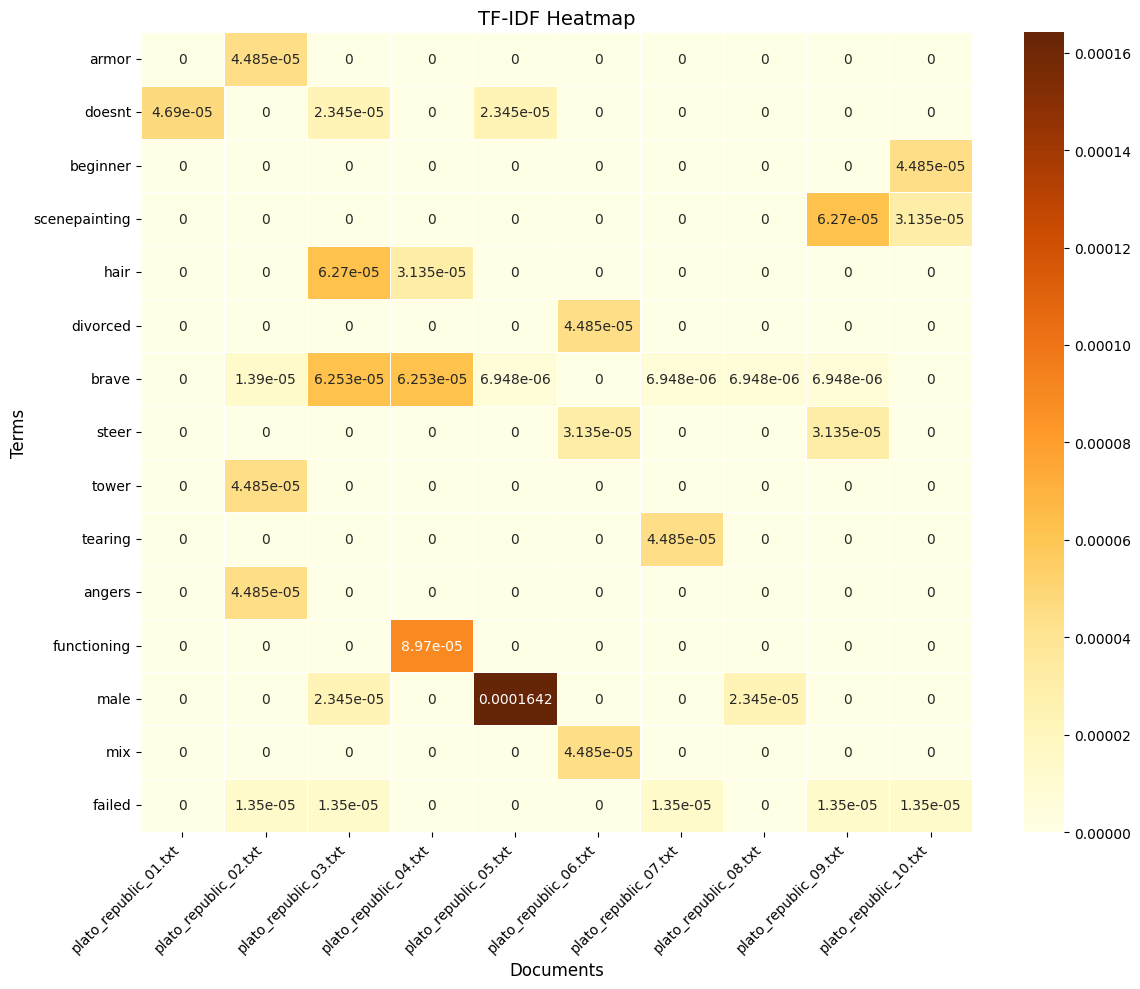

In [7]:
plato_rand_toks = plato_corpus.get_random_tokens(n=15, seed=123)
plato_tf_idf = comp_a.get_tf_idf_batch(plato_rand_toks, plato_corpus)
plato_td_idf_fig = comp_a.plot_tf_idf_matrix(plato_tf_idf)
plt.show()

**Comment:**
Generally, TF-IDF values for presented terms are small, which can be interpreted as quite rare words WITHIN an individual book but also even more uncommon for other books. Some terms will be analysed in more detail:

- 'brave': This term does not occur in book no.1, no.6 and no.10. Within the books in which it occurs, it is most common for books no.3 and no.4. In the same line of reasoning, it is most rarely used in books no.5, no.7, no.8 and no.9.
- 'angers' v. 'functioning': Both of this term are unique for book no.2 and no.4 respectively. Nonetheless, within these books, 'functioning' is more common for book no.4 than 'angers' is common for book no.2.
- 'male': This term has highest TF-IDF value in book no.5. With TF-IDF value this high we can start to hypothesise that this book concerns topic related to word 'male', as it rarely occurres in other books, but in book no.5 it is used relatively commonly.

**Trend of individual terms over books in Plato's Republic:**

For this analysis I decided to use two terms not analysed so far *('justice, 'glaucon')*, and two which has been already shown in TF-IDF map *('brave', 'male')*, in order to compare these two tools.

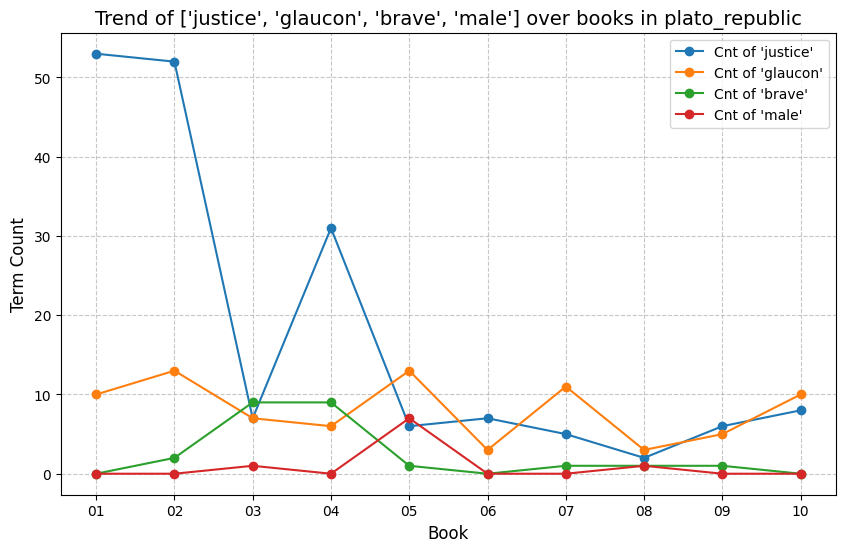

In [8]:
plato_change_fig = re_vis.change_over_time_plato(plato_corpus, ['justice', 'glaucon', 'brave', 'male'])
plt.show()

**Comment:**
At this point-plot we can track counts of chosen terms over consecutive books.
- *'justice'*: This term is used commonly in first two books (over 50 times), and then again in third book.
- *'glaucon'*: Glaucon is one of the characters in the Republic. Based on this plot, we can reason that he has been more active in the dialogue in some books and less active in others.
- *'brave'*: This term occured most commonly in book no.3 and no.4, while still being present in other books but much more rarely or non-existent in books no.1, no.6 and no.10. This interpretation is almost identical to the one made based on TF-IDF heatmap analysis.
- *'male'*: Again, this trend also shows results obtained in TF-IDF heatmap. Just as proposed, 'male' occurs almost exclusively in book no.5.
- *'male'* and *'glaucon'*: Both these terms have been most extensively used in book no.5, from which we can conclude that Glaucon took part in a dialogue concerning topic related to word *'male'*. After reading book no.5 we find out, that this is precisely the case! Glaucon and Socrates debate whether male and female natures are distinct regarding governance and education. The term 'male' appears in the context of comparing the capacities and roles of men and women as guardians and contributors to the state. 